# Analysis of German Renewables - Time Series 

In [114]:
#This time Series is in a 60 minute frequency
#Countries are rapidly expanding their country toals of elecricity consumption
#The Data set can be found in the Github Repository or here at - https://data.open-power-system-data.org/time_series/2019-06-05
#The readme for the data is here: https://data.open-power-system-data.org/time_series/2019-06-05/README.md

#Import needed modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,5)
import matplotlib.dates as mdates
import numpy as np

#I've filtered the data on the download website to just Germany and the data will be from 2015-01-01 to 2019-05-01
#https://data.open-power-system-data.org/time_series/2019-06-05
opsd_60min = pd.read_csv(r'C:\Users\agilarde\Downloads\time_series_60min_singleindex_filtered.csv',index_col=0,parse_dates=True)

In [76]:
opsd_60min.shape

(37945, 60)

In [77]:
#So we have 500k rows and 77 columns
#Let's see the head
opsd_60min.head(5)

,cet_cest_timestamp,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,...,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,47445.360825,41987,41889.0,25.02,37759.0,0.0,0.0,37586.0,8644.0,...,4228.0,468.0,3592.0,5470,4997.0,0.0,0.0,4.0,0.0,4.0
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,45923.711340,40665,39970.0,18.29,37759.0,0.0,0.0,37586.0,8814.0,...,4470.0,468.0,3415.0,5327,4717.0,0.0,0.0,5.0,0.0,5.0
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,44295.876289,39510,38813.0,16.04,37759.0,0.0,0.0,37586.0,9054.0,...,4550.0,466.0,3508.0,5087,4562.0,0.0,0.0,7.0,0.0,7.0
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,42868.041237,38537,38490.0,14.60,37759.0,0.0,0.0,37586.0,9070.0,...,4611.0,470.0,3724.0,4906,4517.0,0.0,0.0,8.0,0.0,8.0
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,42230.927835,38153,38644.0,14.95,37759.0,0.0,0.0,37586.0,9164.0,...,4707.0,474.0,3973.0,4865,4601.0,0.0,0.0,11.0,0.0,11.0


In [78]:
opsd_60min.tail(5)

,cet_cest_timestamp,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,...,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-30 19:00:00+00:00,2019-04-30T21:00:00+0200,NaN,54612,53975.0,NaN,NaN,NaN,NaN,NaN,8194.0,...,3218.0,1207.0,3568.0,6927,7086.0,NaN,NaN,33.0,112.0,33.0
2019-04-30 20:00:00+00:00,2019-04-30T22:00:00+0200,NaN,51309,51542.0,NaN,NaN,NaN,NaN,NaN,8659.0,...,3152.0,1149.0,3414.0,6369,6574.0,NaN,NaN,51.0,108.0,51.0
2019-04-30 21:00:00+00:00,2019-04-30T23:00:00+0200,NaN,47886,47561.0,NaN,NaN,NaN,NaN,NaN,8414.0,...,3025.0,1227.0,3029.0,5800,5933.0,NaN,NaN,61.0,94.0,61.0
2019-04-30 22:00:00+00:00,2019-05-01T00:00:00+0200,NaN,44594,41060.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5395,4416.0,NaN,NaN,NaN,NaN,NaN
2019-04-30 23:00:00+00:00,2019-05-01T01:00:00+0200,NaN,42599,39328.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5147,4236.0,NaN,NaN,NaN,NaN,NaN


In [79]:
#A breakdown of the variables can be found in the Readme
#However, I'm interested in Germany's Solar + Wind Generation 
#The variables we are interested in are as follows:
#* utc_timestamp
#    - Type: datetime
#    - Format: fmt:%Y-%m-%dT%H%M%SZ
#    - Description: Start of timeperiod in Coordinated Universal Time

#* DE_wind_generation_actual
#    - Type: number
#    - Description: Actual wind generation in Germany in MW

#* DE_solar_generation_actual
#    - Type: number
#    - Description: Actual solar generation in Germany in MW

#* DE_load_actual_entsoe_transparency
#    - Type: number
#    - Description: Total load in Germany in MW as published on ENTSO-E Transparency Platform

#Sum the columns for later use
opsd_60min['german_renewables'] = opsd_60min["DE_wind_onshore_generation_actual"] + opsd_60min['DE_solar_generation_actual'] 
opsd_60min['german_ratio'] = opsd_60min["german_renewables"]/opsd_60min["DE_load_actual_entsoe_transparency"]
#Define the data frame as the few variables we'd like to analyze
df=opsd_60min[["DE_wind_onshore_generation_actual","DE_solar_generation_actual","german_renewables","DE_load_actual_entsoe_transparency","german_ratio"]]
df.columns = ["german_wind","german_solar","german_renewables","consumption","ratio"]

## Visualize our Data

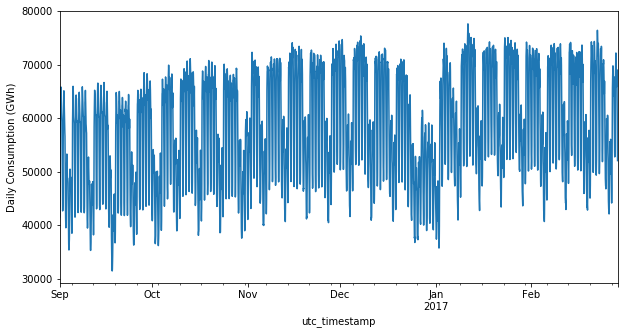

In [81]:
ax = df.loc['2016-09':'2017-02', 'consumption'].plot(linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

#This is interesting because it would seem that consumption isn't necessarilly affacted in the winter, however it drops
#in Jan.

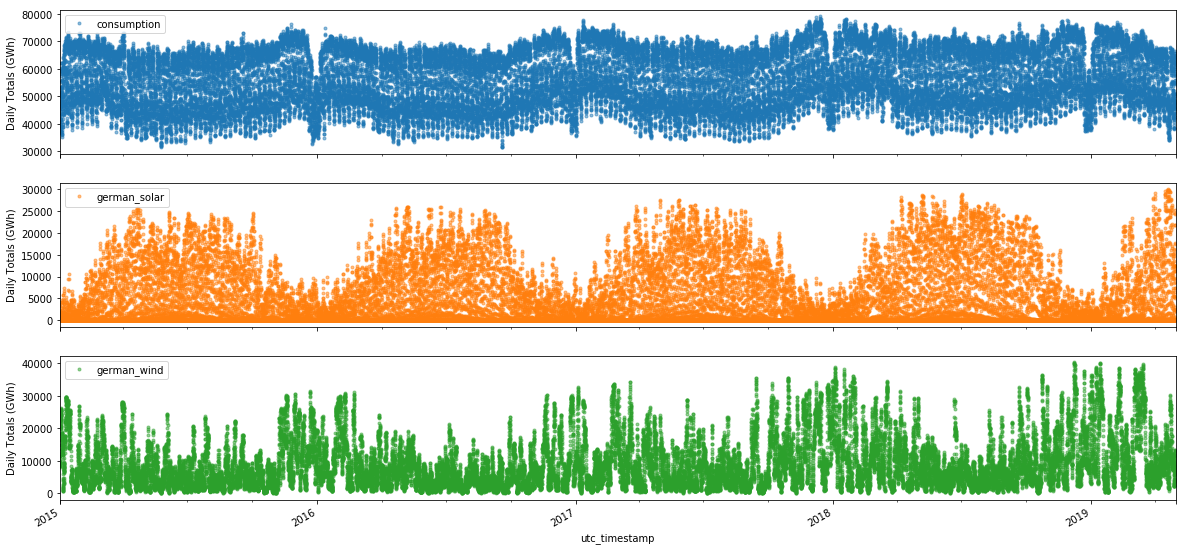

In [82]:
cols_plot = ['consumption', 'german_solar', 'german_wind']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

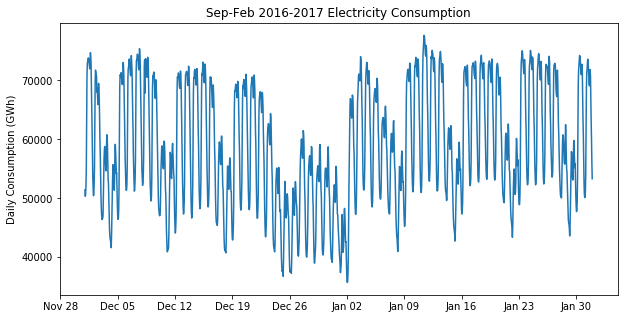

In [83]:
#Let's see the vertical gride as tick lables on each monday so we can tell when the weeks change
#Let's also zoom in on that drop in december to Jan consumption

fig, ax = plt.subplots()
ax.plot(df.loc['2016-12':'2017-01', 'consumption'], linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Sep-Feb 2016-2017 Electricity Consumption')
# axis ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Means & Resampling

In [85]:
#Now I want to re-sample and plot a few different ways to be able to better understand the statistics involved
#plus this allows our time series to have significantly less data points to handle than the hourly time series

# Specify the data columns we want to include
data_columns = ['consumption', 'german_wind', 'german_solar', 'german_renewables','ratio']
# Resample to weekly frequency, aggregating with mean
df_daily_mean = df[data_columns].resample('D').mean()
df_weekly_mean = df[data_columns].resample('W').mean()
df_month_mean = df[data_columns].resample('M').mean()
df_yearly_mean = df[data_columns].resample('Y').mean()
df_monthly = df[data_columns].resample('M').sum()
df_daily = df[data_columns].resample('D').sum()
df_yearly = df[data_columns].resample('Y').sum()
df_weekly = df[data_columns].resample('W').sum()

In [86]:
#Quick check on how many rows each have now that I've resampled
print(df_daily_mean.shape[0])
print(df_weekly_mean.shape[0])
print(df_month_mean.shape[0])
print(df_yearly_mean.shape[0])
print(df_monthly.shape[0])

1582
227
53
6
53


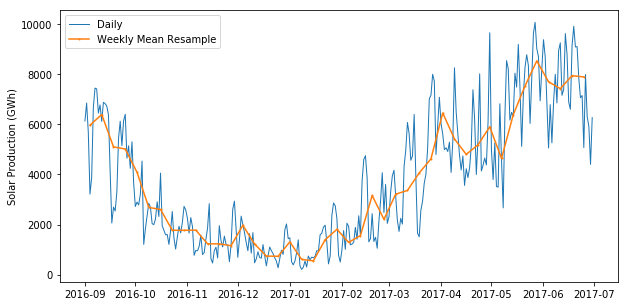

In [87]:
#Let's plot
start, end = '2016-09', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(df_daily_mean.loc[start:end, 'german_solar'], linestyle='-', linewidth=1, label='Daily')
ax.plot(df_weekly_mean.loc[start:end, 'german_solar'],
marker='o', markersize=1, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

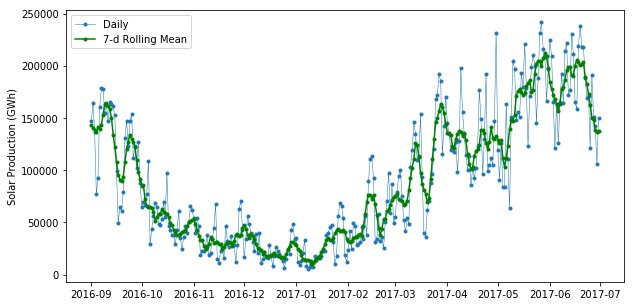

In [88]:
#Rolling mean
df_7d = df_daily[data_columns].rolling(7, center=True).mean()

#Plot
start, end = '2016-09', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(df_daily.loc[start:end, 'german_solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_7d.loc[start:end, 'german_solar'],
marker='.', linestyle='-', label='7-d Rolling Mean', color ='green')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

## Trends

In [90]:
#let's calculate a 365d rolling mean as well
df_365d = df_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

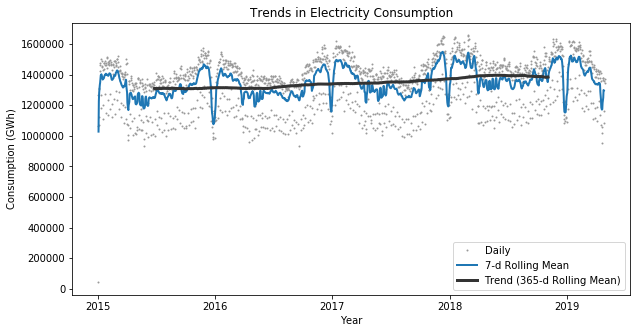

In [91]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(df_daily['consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(df_7d['consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(df_365d['consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

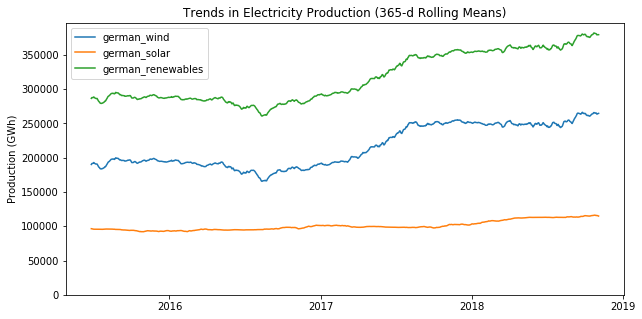

In [92]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['german_wind', 'german_solar', 'german_renewables']:
    ax.plot(df_365d[nm], label=nm)
# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

## Future Ideas - Forecasting using different models

In [94]:
from statsmodels.tsa.stattools import acf, pacf

In [95]:
df_predict=df_weekly[["german_solar","german_wind"]]
df_predict.columns = ["wind","solar"]

(array([42., 32., 15., 18., 20., 31., 30., 18., 19.,  2.]),
 array([  52057. ,  206685.9,  361314.8,  515943.7,  670572.6,  825201.5,
         979830.4, 1134459.3, 1289088.2, 1443717.1, 1598346. ]),
 <a list of 10 Patch objects>)

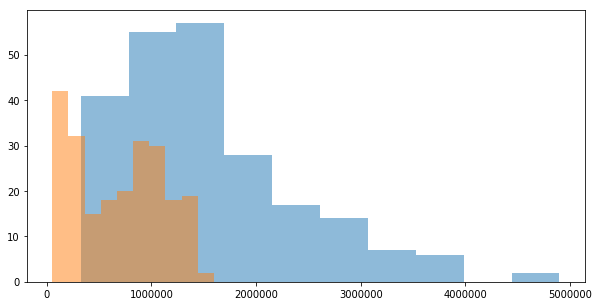

In [110]:
plt.hist(df_predict['solar'], alpha=0.5, label='Solar')
plt.hist(df_predict['wind'], alpha=0.5, label='Wind')

(array([ 3.,  5., 17., 14., 19., 19., 18., 30., 63., 39.]),
 array([4.71647914, 4.8651983 , 5.01391747, 5.16263664, 5.3113558 ,
        5.46007497, 5.60879413, 5.7575133 , 5.90623247, 6.05495163,
        6.2036708 ]),
 <a list of 10 Patch objects>)

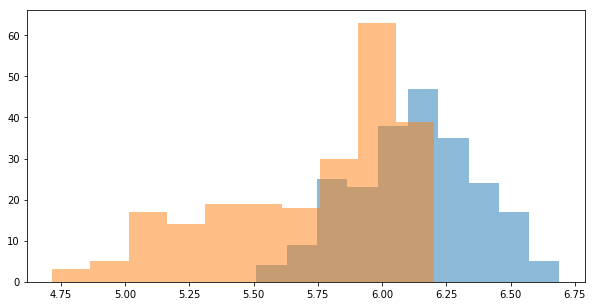

In [112]:
dflog['solar'] = np.log10(df_predict['solar'])
dflog['wind'] = np.log10(df_predict['wind'])

plt.hist(dflog['solar'], alpha=0.5, label='Solar')
plt.hist(dflog['wind'], alpha=0.5, label='Wind')